<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Breast_Cancer.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Breast Cancer Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Binary classification | Predict if a tumor is benign or malignant |


## About the dataset

The [Breast Cancer][1] dataset is used for multivariate binary classification. There are 569 total samples with 30 features each. Features were computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.

![](images/breast-cancer-logo.jpg)

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## Package setup

In [2]:
#DO THE NECESSARY IMPORTS
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
# Display plots inline, change default figure size and change plot resolution to retina
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults

sns.set()

## Step 1: Loading the data
**EXERCISE: In a similar was as you did with iris and wine ;).**

In [5]:
cancer_data = load_breast_cancer()
cancer_data.keys()
print(cancer_data.feature_names)
print(cancer_data.target_names)
print(cancer_data.target[0:10])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0]


In [7]:
df = pd.DataFrame(cancer_data.data)
# Create columns in df
df.columns = cancer_data.feature_names
# Create a target column with the dataset target
df['target'] = cancer_data.target
df['class'] = df['target'].apply(lambda x: cancer_data['target_names'][x])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


Since the original labels are in 0,1 format, we could change the labels to benign and malignant using .replace function. Using inplace=True will modify the dataframe breast_dataset.
**Optional**

In [5]:
#df_breast['target'].replace(0, 'Malignant',inplace=True)
#df_breast['target'].replace(1, 'Benign',inplace=True)
#if we do this we should also drop the class
#df=df.drop("class")
#df_breast.head()

## Visualizing the Breast Cancer data

In [47]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
class                      0
dtype: int64

### Select your X and y's

In [14]:
# YOUR CODE HERE
X = df.drop(['target', 'class'], axis=1)
y= df.target

### Step 2: Normalize the data in X

In [18]:
#do the necessary imports (you can also do them all above)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print(X_scaled)
print(type(X_scaled))

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
<class 'numpy.ndarray'>


### Optional

Convert this to a pandas dataframe again in order to visualize it. 

In [21]:
df_viz = pd.DataFrame(X_scaled)
df_viz.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Short exercise
Let's check whether the normalized data has a mean of zero and a standard deviation of one. **Those are indicators of proper normalization**

## Apply the PCA Method

In [28]:
#do the necessary imports
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

Next, let's create a **new DataFrame** that will have the principal component values for all the samples.

In [29]:
df_pca = pd.DataFrame(X_pca, columns=['principal component 1','principal component 2'])
df_pca.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Once you have the principal components, you can find the **explained_variance_ratio**. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [30]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds **44.2%** of the information while the principal component 2 holds only **19%** of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

## Plotting the visualization

<Figure size 432x288 with 0 Axes>

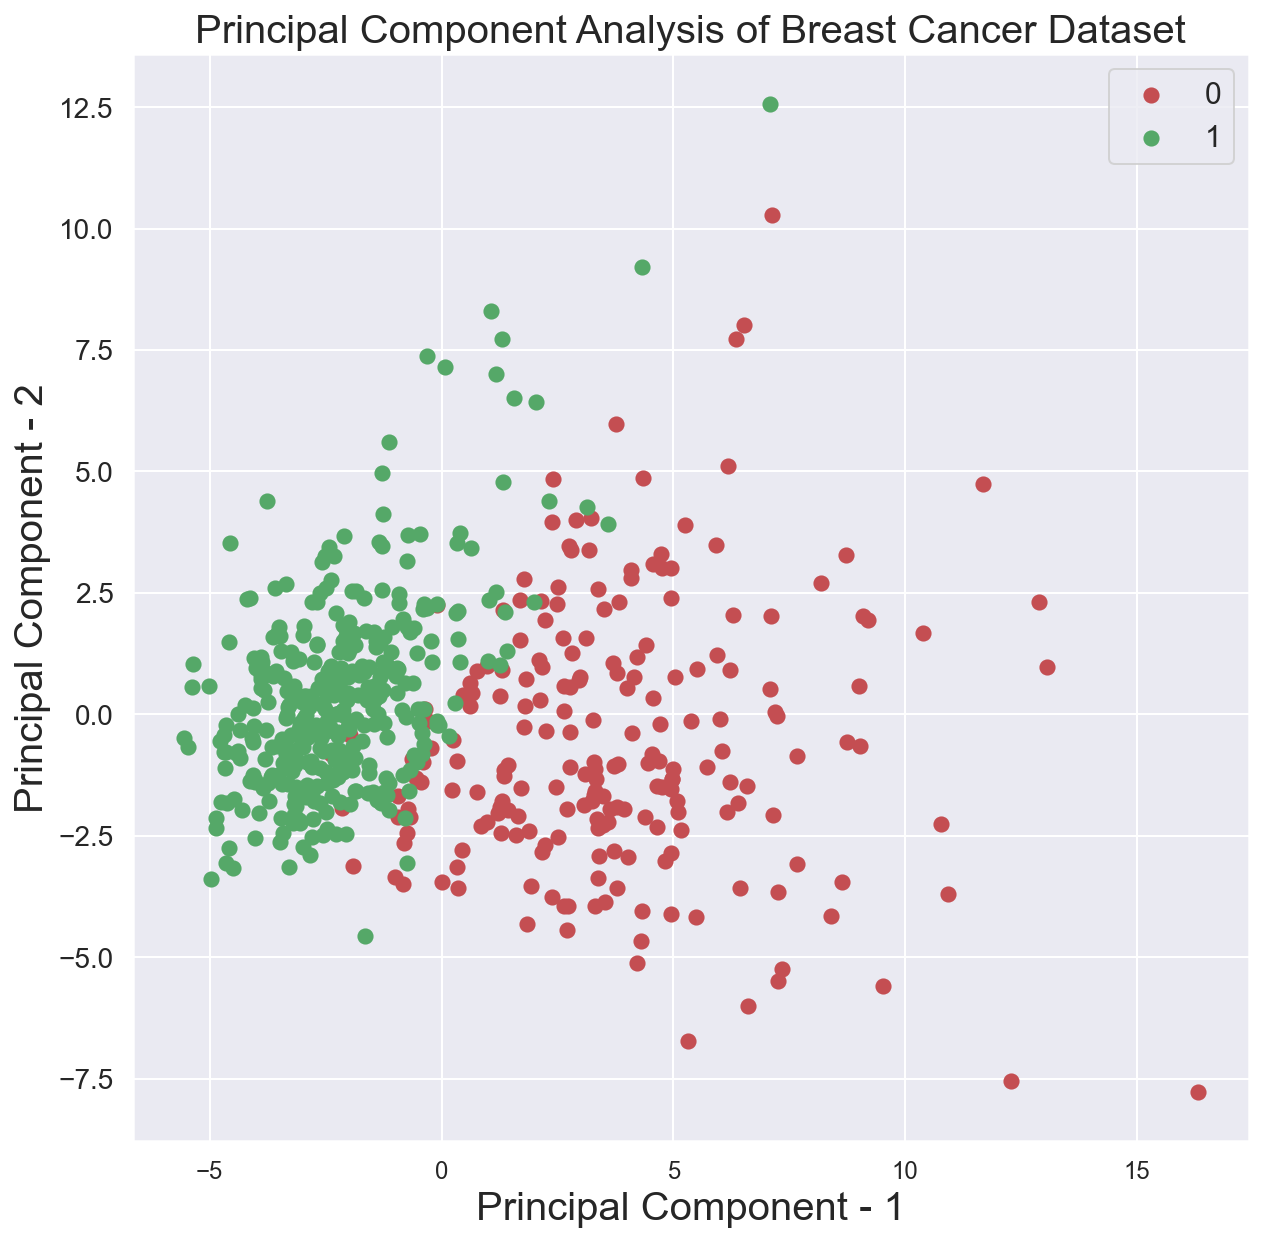

In [35]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Additional Challenge: Can you fix the labels in the plot so they are the original classes? 
Benign and Malign instead of 1 and 0

<Figure size 432x288 with 0 Axes>

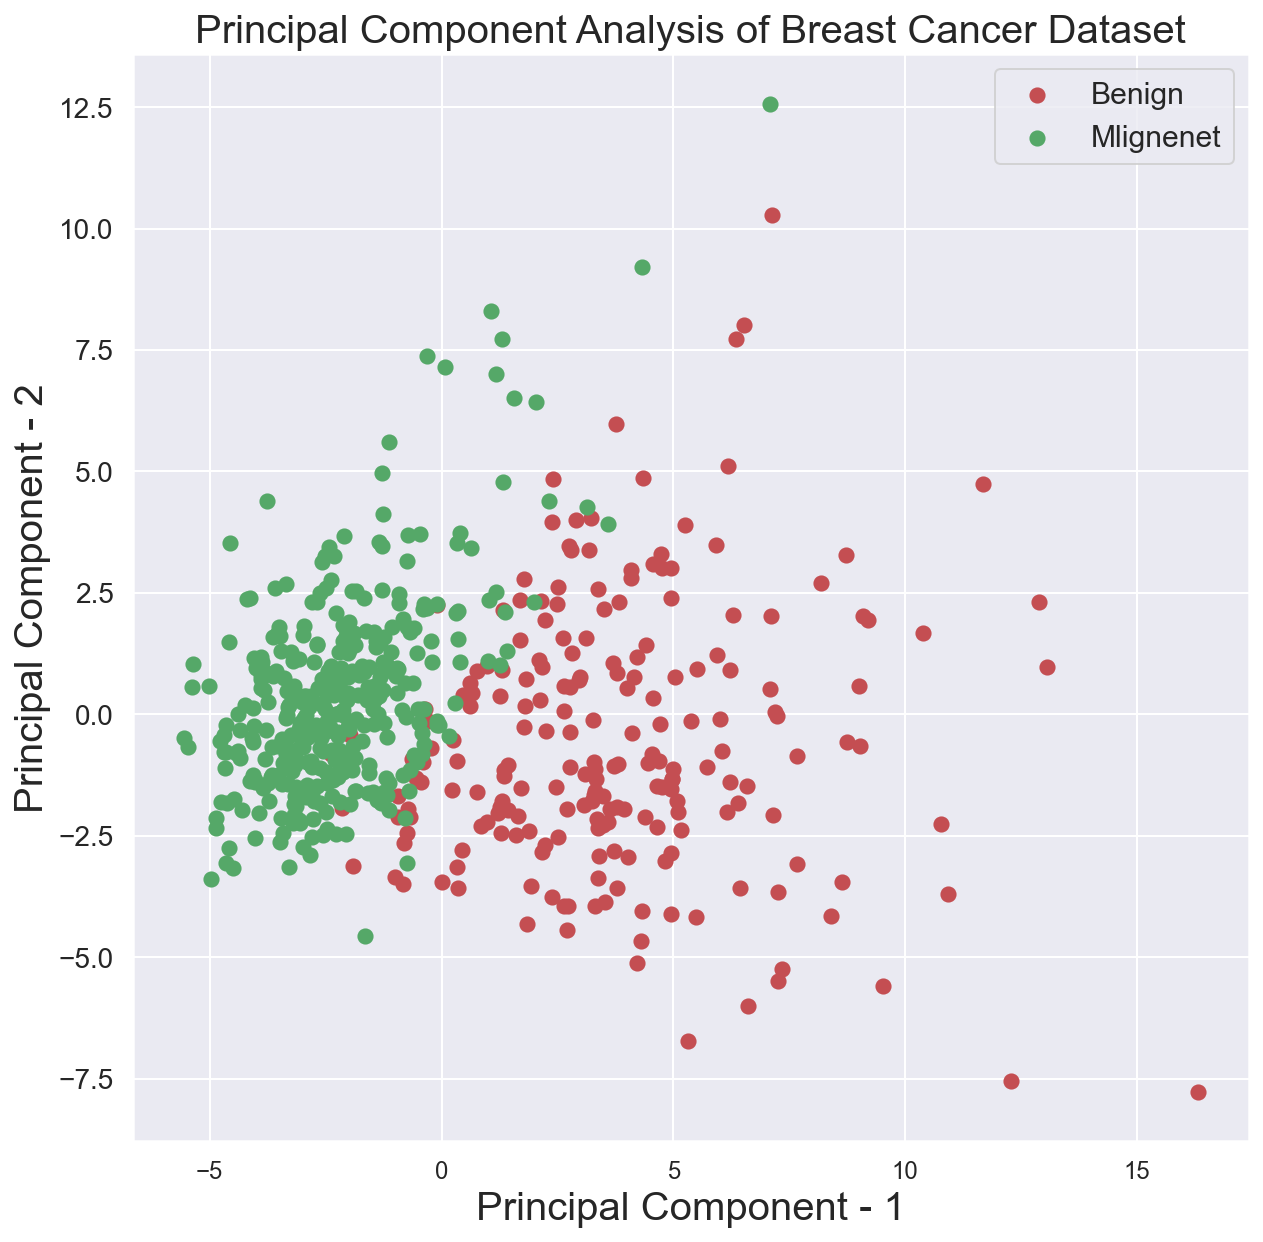

In [34]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
# target_names = 
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(['Benign', "Mlignenet"],prop={'size': 15})

### Logistic Regression - without PCA

In [113]:
X = df.drop(['target', 'class'], axis=1)
y= df.target



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.20, random_state=999)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_s_train = scalar.fit_transform(X_train)
X_s_test = scalar.fit_transform(X_test)
# print(X_scaled)
print(type(X_scaled))

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model_lg = lg.fit(X_s_train, y_train)
y_pred_lg = model_lg.predict(X_s_test)
y_pred_prob_lg = model_lg.predict_proba(X_s_test)
print(model_lg.score(X_s_test, y_test))

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred_lg))
print(confusion_matrix(y_test,y_pred_lg))

<class 'numpy.ndarray'>
0.9298245614035088
0.9298245614035088
[[43  8]
 [ 0 63]]


In [114]:
y_pred_lg[0:8]

array([1, 0, 1, 0, 1, 1, 1, 0])

In [115]:
y_pred_prob_lg[0:8]

array([[3.71050938e-03, 9.96289491e-01],
       [9.99999869e-01, 1.31446601e-07],
       [7.00919039e-02, 9.29908096e-01],
       [1.00000000e+00, 2.16709482e-11],
       [8.42710936e-04, 9.99157289e-01],
       [8.01389484e-02, 9.19861052e-01],
       [7.55554529e-04, 9.99244445e-01],
       [1.00000000e+00, 3.42317498e-12]])

### RandomForestClassifier - without PCA

In [99]:
X = df.drop(['target', 'class'], axis=1)
y= df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train,y_train)
y_pred_rfc = model.predict(X_test)
y_pred_prob_rfc = model.predict_proba(X_test)
model_rfc.score(X_test, y_test)

0.9649122807017544

In [100]:
y_pred_rfc[0:8]

array([1, 0, 0, 1, 1, 0, 0, 0])

The function `predict_proba()` returns a numpy array of two columns. The first column is the probability that `target=0` and the second column is the probability that `target=1`. That is why we add `[:,1]` after `predict_proba()` in order to get the probabilities of `target=1`.

In [101]:
y_pred_prob_rfc[0:8]

array([[0.07, 0.93],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.87, 0.13]])

In [36]:
X = df.drop(['target', 'class'], axis=1)
y= df.target

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print(X_scaled)
print(type(X_scaled))

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
<class 'numpy.ndarray'>


Text(0, 0.5, 'cumulatve explained variance')

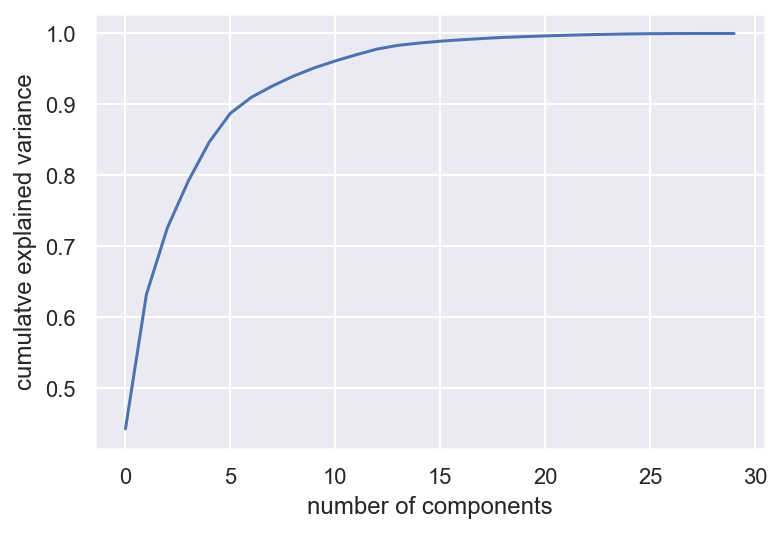

In [38]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulatve explained variance')

#### Trying to hit 95% variance, take n_components=15 initially

In [40]:
n_components=15
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Calculating 95% Variance
total_variance = sum(pca.explained_variance_)
print(f"Total varinace in the dataset: {total_variance}")
var_95 = total_variance * 0.95
print(f"The 95% variance that we want to have is: {var_95}")
print("")

Total varinace in the dataset: 29.646746927328085
The 95% variance that we want to have is: 28.164409580961678



In [42]:
# Creating a dataframe with the components and the explained_variance
a = zip(range(0, n_components), pca.explained_variance_)
df_comp = pd.DataFrame(a, columns=['no. of components', 'explained_variance_'])
df_comp

,no. of components,explained_variance_
0,0,13.304991
1,1,5.701375
2,2,2.822910
3,3,1.984128
4,4,1.651633
5,5,1.209482
6,6,0.676409
7,7,0.477456
8,8,0.417629
9,9,0.351311


In [53]:
pca.explained_variance_ratio_[1]

0.18971182044033083

In [54]:
pca.explained_variance_[1]

5.701374603726141

In [77]:
print("Variance explain with 8 n_compononets: ", sum(df_comp["explained_variance_"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(df_comp["explained_variance_"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(df_comp["explained_variance_"][0:10]))
print("Variance explain with 11 n_compononets: ", sum(df_comp["explained_variance_"][0:11]))
print("Variance explain with 12 n_compononets: ", sum(df_comp["explained_variance_"][0:12]))
print("Variance explain with 13 n_compononets: ", sum(df_comp["explained_variance_"][0:13]))
print("Variance explain with 14 n_compononets: ", sum(df_comp["explained_variance_"][0:14]))


Variance explain with 8 n_compononets:  27.82838368936062
Variance explain with 9 n_compononets:  28.24601247146844
Variance explain with 10 n_compononets:  28.597323346350173
Variance explain with 11 n_compononets:  28.891756499841335
Variance explain with 12 n_compononets:  29.153377661207454
Variance explain with 13 n_compononets:  29.395160082535746
Variance explain with 14 n_compononets:  29.552446231751873


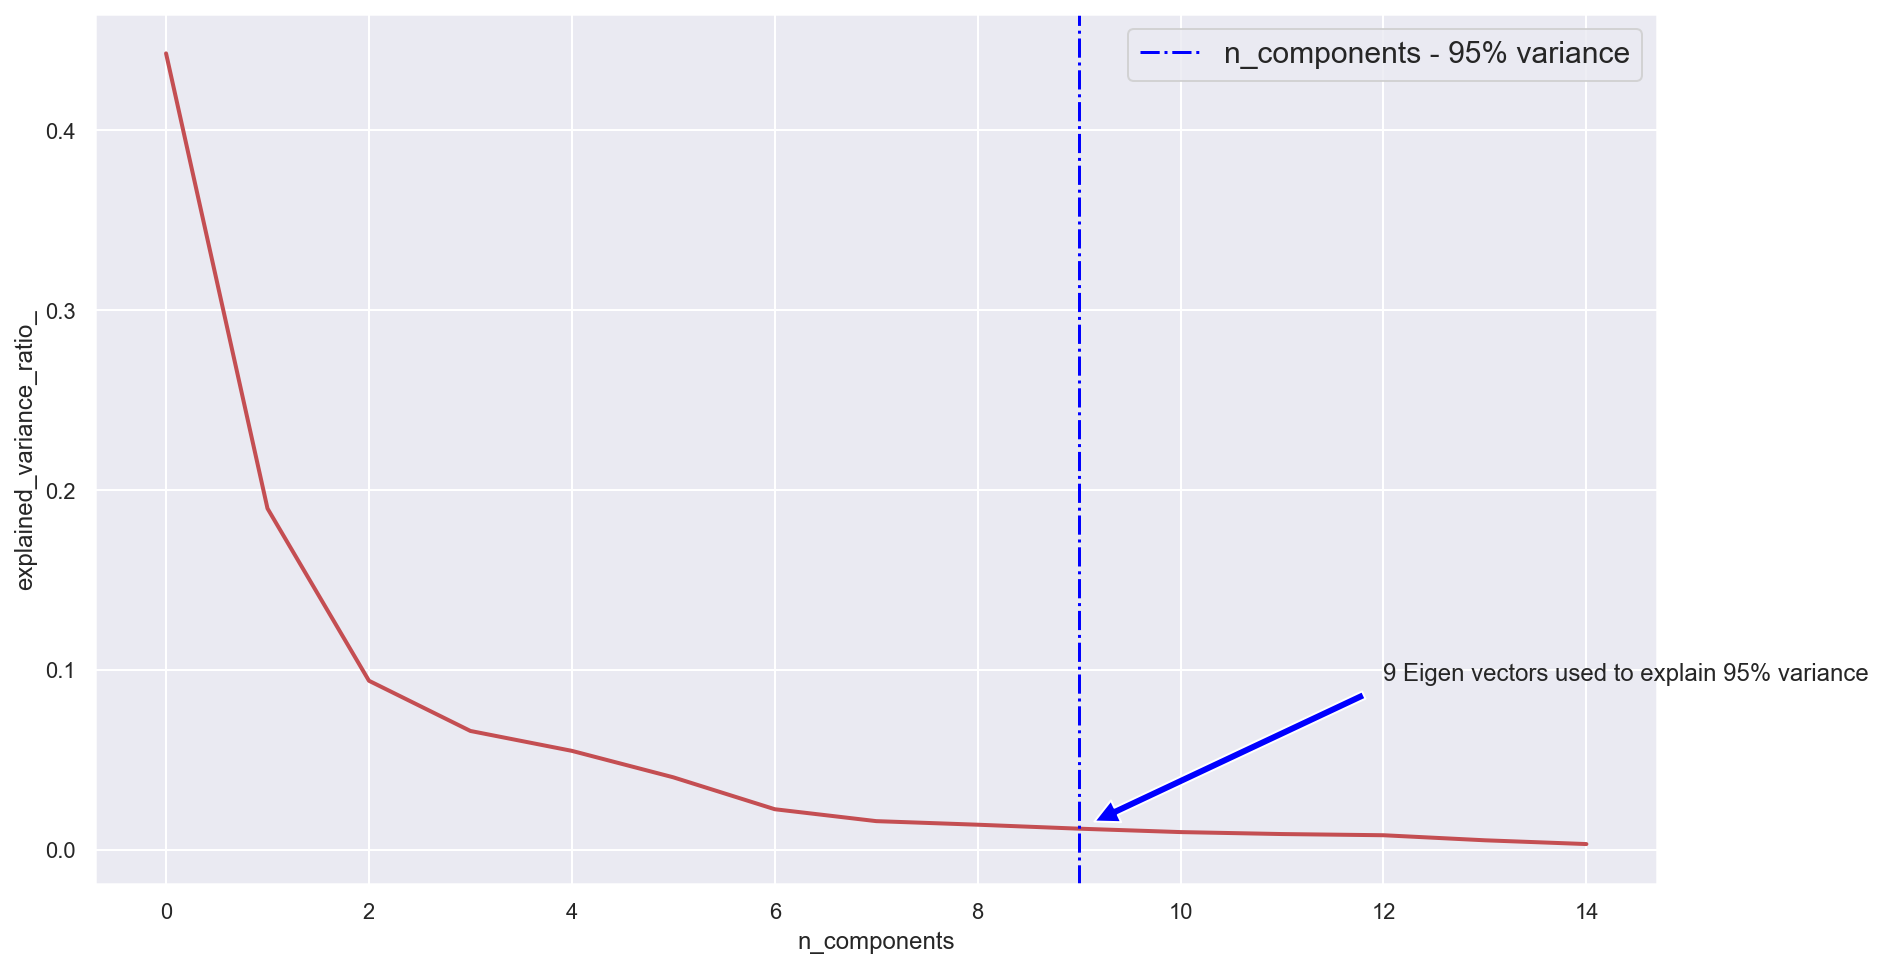

In [102]:
# Plotting the data
plt.figure(figsize=(14,8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
# plotting a line with 95% eigen vector
plt.axvline(9, linestyle='-.', label='n_components - 95% variance',c='blue')
plt.legend(prop=dict(size=15))

plt.annotate("9 Eigen vectors used to explain 95% variance", 
             xy=(9, pca.explained_variance_ratio_[9]), 
            xytext=(12, pca.explained_variance_ratio_[2]),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.show()

#### Running PCA again with n_components=9

In [119]:
X = df.drop(['target', 'class'], axis=1)
y= df.target

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(type(X_pca))

# applying train_test_split
X_train,X_test, y_train,y_test=train_test_split(X_pca, y, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_s_train = scalar.fit_transform(X_train)
X_s_test = scalar.fit_transform(X_test)
# print(X_scaled)
print(type(X_scaled))


# Applying LogisticRegression
log_reg = LogisticRegression()
lg_model = log_reg.fit(X_s_train, y_train)
y_pred = lg_model.predict(X_s_test)
y_pred_prob = lg_model.predict_proba(X_s_test)
print(lg_model.score(X_s_test, y_test))

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.9736842105263158
0.9736842105263158
[[40  3]
 [ 0 71]]
